<font color='blue' size=5><b>Комментарий ревьюера</b></font>

<font color='blue'>Привет, Андрей! Меня зовут Павел Григорьев, и я буду проверять этот проект.<br>Моя основная цель - не указать на совершённые тобой ошибки, а поделиться своим опытом и помочь тебе совершенствоваться как профессионалу.<br>Спасибо за проделанную работу! Предлагаю общаться на «ты».</font>
<details>
	<summary><u>Инструкция по организационным мометнам (кликабельно)</u></summary>
<font color='blue'>Я буду использовать различные цвета, чтобы было удобнее воспринимать мои комментарии:</font>


---


<font color='blue'>синий текст - просто текст комментария</font>

<font color='green'>✔️ и зеленый текст - все отлично</font>

<font color='orange'>⚠️ и оранжевый текст - сделано все правильно, однако есть рекомендации, на что стоит обратить внимание</font>

<font color='red'>❌ и красный текст - есть недочеты</font>


</details>    
    </br>
<font color='blue'>Пожалуйста, не удаляй мои комментарии в случае возврата работы, так будет проще разобраться, какие были недочеты, а также сразу увидеть исправленное. </font>

Ответы на мои комментарии лучше тоже помечать.
Например: <font color='purple'><b>Комментарий студента</b></font>

<font color='blue'><b>Давай смотреть, что получилось!</b></font>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> Прошу прощения. Хотел проверить одну функцию и отправил файл. Думал, что удалю сразу, но не нашел способ как это сделать. У меня остается мало времени на сдачу проекта, надеюсь на Вашу поддержку
</div>

<font color='blue' size=3><b>Комментарий ревьюера 2</b></font>

<font color='blue'>Привет еще раз. Спасибо, за исправления. Оформление комментариев по работе сохраняется. Только обозначим, что это вторая итерация.</font>

# Сборный проект 2

## Описание проекта

### Описание целей и задачи проекта

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.
Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. В вашем распоряжении данные с параметрами добычи и очистки.
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

### Опсиание данных

Технологический процесс
* Rougher feed — исходное сырье
* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
  * Xanthate — ксантогенат (промотер, или активатор флотации);
  * Sulphate — сульфат (на данном производстве сульфид натрия);
  * Depressant — депрессант (силикат натрия).
* Rougher process (англ. «грубый процесс») — флотация
* Rougher tails — отвальные хвосты
* Float banks — флотационная установка
* Cleaner process — очистка
* Rougher Au — черновой концентрат золота
* Final Au — финальный концентрат золота

Параметры этапов

* air amount — объём воздуха
* fluid levels — уровень жидкости
* feed size — размер гранул сырья
* feed rate — скорость подачи

### План работы

1.Подготовить данные
2.Проанализировать данные
3.Построить модель

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import TimeSeriesSplit, cross_val_score, StratifiedKFold, GridSearchCV, cross_validate, KFold
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn import linear_model

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Хорошее оформление импортов! \
Импорты собраны в одной ячейке, разделены на функциональные группы пустой строкой.</font>

In [2]:
#чтение файлов
#df_train = pd.read_csv('C:\\Users\\ASUS\\Downloads\\gold_recovery_train_new.csv')
#df_test = pd.read_csv('C:\\Users\\ASUS\\Downloads\\gold_recovery_test_new.csv')
#df_full = pd.read_csv('C:\\Users\\ASUS\\Downloads\\gold_recovery_full_new.csv')
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> Используй конструкцию try: except: для разных путей загрузки данных.</font>

In [3]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [5]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [8]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Первичный осмотр проведен.</font>

In [9]:
#целевое значение эффективности обогащения
df_train['rougher.output.recovery'].head()

0    87.107763
1    86.843261
2    86.842308
3    87.226430
4    86.688794
Name: rougher.output.recovery, dtype: float64

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> По заданию нужно проверить обучающую выборку.</font>

<div class="alert alert-block alert-warning">
<b>Комментарий студента[2]:</b> исправил.
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

In [10]:
#константы для расчета эффективности обогощения
C=df_train['rougher.output.concentrate_au']
F=df_train['rougher.input.feed_au']
T=df_train['rougher.output.tail_au']

In [11]:
#Расчет эффективности обогощения
recovery = (C * (F - T)) / (F * (C - T)) * 100
recovery[recovery == 0]

45      -0.0
46      -0.0
47      -0.0
48      -0.0
49      -0.0
        ... 
10330   -0.0
10331   -0.0
10332   -0.0
10333   -0.0
10334   -0.0
Length: 297, dtype: float64

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>Расчёт верный!</font>

In [12]:
recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> почему показывают значения -0? Это особенности pandas?
</div>

<font color='blue'><b>Комментарий ревьюера: </b></font>\
<font color='blue'>Здесь это артефакт векторных вычислений. На практике -0 == 0. [Узнать больше](https://stackoverflow.com/questions/28272606/dealing-with-0-and-0-in-pandas-and-numpy)</font>

In [13]:
recovery[recovery == 0] = 0
recovery[recovery == 0]

45       0.0
46       0.0
47       0.0
48       0.0
49       0.0
        ... 
10330    0.0
10331    0.0
10332    0.0
10333    0.0
10334    0.0
Length: 297, dtype: float64

In [14]:
df_train[df_train['rougher.output.recovery'] == recovery]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
12,2016-01-15 12:00:00,5.664983,10.168953,5.484318,43.339714,72.659046,10.475957,1.050592,17.525656,2.064422,...,13.983963,-503.675714,11.928745,-500.583183,9.970359,-498.822343,8.016377,-499.013145,14.000032,-600.024741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14141,2018-08-18 03:59:59,2.925574,10.855586,7.053796,47.765393,64.054699,8.578502,3.365823,10.603464,1.761994,...,23.030949,-501.196721,20.034440,-499.842047,18.001504,-499.872052,12.998309,-500.027809,20.007108,-500.850685
14142,2018-08-18 04:59:59,3.076566,11.542302,6.929418,46.956275,68.643324,8.792890,3.120351,10.184715,1.567363,...,23.033246,-500.912210,19.988437,-500.125966,18.011724,-500.090861,13.007108,-500.258238,19.983872,-502.581707
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608


In [15]:
mean_absolute_error(recovery,df_train['rougher.output.recovery'])

9.73512347450521e-15

Т.к. MAE стремится к 0 => эффективность обогащения рассчитана правильно. 

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

### Недоступные признаки в тестовой выборки

* final.output - параметры продукта финального концентрата
* rougher.output - параметры продукта флотации
* rougher.calculation - расчетные хар-ки флотации
* primary_cleaner.output - параметры продукта первичной очистки
* secondary_cleaner.output - параметры продукта вторичной очистки

Параметры продукта и расчетные хар-ки недоступны в тестовой выборки, т.к. их еще нужно предсказать с помощью модели. 

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Верно!</font>

### Поиск дубликатов

In [16]:
print(df_train.duplicated().sum())
print(df_test.duplicated().sum())
print(df_full.duplicated().sum())

0
0
0


In [17]:
df_train[df_train.duplicated(subset='date')]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [18]:
df_test[df_test.duplicated(subset='date')]

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [19]:
df_full[df_full.duplicated(subset='date')]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


Дубликаты отсутствуют

In [20]:
df_train.shape

(14149, 87)

### Заполнение пропусков

In [21]:
df_train=df_train.ffill(axis=0)
df_train=df_train.ffill(axis=1)
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.22493,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.03651,-500.857308,11.99955,-501.193686,9.970366,-499.20164,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.95307,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [22]:
df_test=df_test.ffill(axis=0)
df_test=df_test.ffill(axis=1)
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.31785,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.05814,-498.695773,8.130979,-499.634209,7.95827,-525.839648,4.87885,-500.162375,25.01994,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.86836,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.82851,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.64,0.863514,1399.618111,-498.863574,1397.44012,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.9314,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.68253,7.53,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.3975,8.10789,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [23]:
df_full=df_full.ffill(axis=0)
df_full=df_full.ffill(axis=1)
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.19202,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.84198
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.22493,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.03651,-500.857308,11.99955,-501.193686,9.970366,-499.20164,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.95307,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> Пропуски заполнены согласно условию задачи!</font>

In [24]:
#удаление колонок, отсутствующих в тестовой выборке, в обучающей выборке
delete=['final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol','final.output.concentrate_au',
 'final.output.recovery','final.output.tail_ag','final.output.tail_pb','final.output.tail_sol','final.output.tail_au',
 'primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au','primary_cleaner.output.tail_ag','primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol','primary_cleaner.output.tail_au','rougher.calculation.sulfate_to_au_concentrate','rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed','rougher.calculation.au_pb_ratio','rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb','rougher.output.concentrate_sol','rougher.output.concentrate_au','rougher.output.recovery',
 'rougher.output.tail_ag','rougher.output.tail_pb','rougher.output.tail_sol','rougher.output.tail_au',
 'secondary_cleaner.output.tail_ag','secondary_cleaner.output.tail_pb','secondary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au']
df_train_1=df_train.drop(delete, axis=1)

In [25]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   date                                        14149 non-null  object
 1   primary_cleaner.input.sulfate               14149 non-null  object
 2   primary_cleaner.input.depressant            14149 non-null  object
 3   primary_cleaner.input.feed_size             14149 non-null  object
 4   primary_cleaner.input.xanthate              14149 non-null  object
 5   primary_cleaner.state.floatbank8_a_air      14149 non-null  object
 6   primary_cleaner.state.floatbank8_a_level    14149 non-null  object
 7   primary_cleaner.state.floatbank8_b_air      14149 non-null  object
 8   primary_cleaner.state.floatbank8_b_level    14149 non-null  object
 9   primary_cleaner.state.floatbank8_c_air      14149 non-null  object
 10  primary_cleaner.state.

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   date                                        5290 non-null   object
 1   primary_cleaner.input.sulfate               5290 non-null   object
 2   primary_cleaner.input.depressant            5290 non-null   object
 3   primary_cleaner.input.feed_size             5290 non-null   object
 4   primary_cleaner.input.xanthate              5290 non-null   object
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   object
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   object
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   object
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   object
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   object
 10  primary_cleaner.state.fl

In [27]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   date                                                19439 non-null  object
 1   final.output.concentrate_ag                         19439 non-null  object
 2   final.output.concentrate_pb                         19439 non-null  object
 3   final.output.concentrate_sol                        19439 non-null  object
 4   final.output.concentrate_au                         19439 non-null  object
 5   final.output.recovery                               19439 non-null  object
 6   final.output.tail_ag                                19439 non-null  object
 7   final.output.tail_pb                                19439 non-null  object
 8   final.output.tail_sol                               19439 non-null  object
 9   final.

### Вывод

Эффективность обогащения рассчитана правильно. Удалили ненужные признаки с обучающей выборки.

## Анализ данных

### Изменение концентрации металлов

In [28]:
rougher_input=['rougher.input.feed_au','rougher.input.feed_ag','rougher.input.feed_pb']
final=['final.output.concentrate_au','final.output.concentrate_ag','final.output.concentrate_pb']
primary_cleaner=['primary_cleaner.output.tail_au','primary_cleaner.output.tail_ag','primary_cleaner.output.tail_pb']
rougher_out_conc=['rougher.output.concentrate_au','rougher.output.concentrate_ag','rougher.output.concentrate_pb']
rougher_out_tail=['rougher.output.tail_au','rougher.output.tail_ag','rougher.output.tail_pb']
secondary_cleaner=['secondary_cleaner.output.tail_au','secondary_cleaner.output.tail_ag','secondary_cleaner.output.tail_pb']

In [29]:
df_full[rougher_input].head(20)

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb
0,6.48615,6.100378,2.284912
1,6.478583,6.161113,2.266033
2,6.362222,6.116455,2.159622
3,6.118189,6.043309,2.037807
4,5.663707,6.060915,1.786875
5,5.687168,5.80192,1.879351
6,6.038436,6.056253,2.105501
7,6.433854,5.955053,2.310432
8,6.526612,5.878084,2.391713
9,6.633002,5.908793,2.440899


In [30]:
df_full[final].head(20)

,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb
0,42.19202,6.055403,9.889648
1,42.701629,6.029369,9.968944
2,42.657501,6.055926,10.213995
3,42.689819,6.047977,9.977019
4,42.774141,6.148599,10.142511
5,41.633678,6.482968,10.049416
6,41.995316,6.533849,10.058141
7,42.452727,6.130823,9.935481
8,43.404078,5.83414,10.071156
9,43.23522,5.687063,9.980404


In [31]:
df_full[primary_cleaner].head(20)

,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb
0,2.106679,14.936526,2.534912
1,2.353017,16.250511,3.049646
2,2.4168,16.491823,3.124664
3,2.262051,16.024359,2.960362
4,2.277073,16.480185,3.1121
5,2.114558,15.93154,2.844511
6,2.223152,16.078368,2.938979
7,2.112025,15.79772,2.881529
8,2.243817,16.19542,3.089922
9,2.025454,15.535214,2.866688


In [32]:
df_full[rougher_out_conc].head(20)

,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb
0,19.793808,11.500771,7.101074
1,20.050975,11.615865,7.278807
2,19.73717,11.695753,7.216833
3,19.32081,11.915047,7.175616
4,19.216101,12.411054,7.240205
5,18.950385,11.985584,7.121903
6,19.319591,11.684307,7.304849
7,19.507897,11.182624,7.258496
8,19.789465,11.051323,7.380043
9,19.497669,11.116297,7.297363


In [33]:
df_full[rougher_out_tail].head(20)

,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb
0,1.170244,5.008018,0.508728
1,1.184827,4.955378,0.536689
2,1.162562,4.84346,0.546416
3,1.079755,4.655288,0.542525
4,1.012642,4.5528,0.515438
5,0.915835,4.397415,0.49135
6,0.986248,4.47808,0.518266
7,1.11611,4.728325,0.548067
8,1.18678,4.7643,0.599181
9,1.16714,4.667157,0.615418


In [34]:
df_full[secondary_cleaner].head(20)

,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb
0,2.606185,14.500184,4.694824
1,2.488248,14.265474,4.592547
2,2.458187,14.115662,4.624775
3,2.322062,13.732071,4.482453
4,2.330448,14.079996,4.470737
5,2.192127,13.615012,4.286817
6,2.31672,13.597056,4.487865
7,2.192197,13.177237,4.432448
8,2.212084,13.48787,4.608756
9,2.073737,13.209191,4.550553


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> как построить гистограмму? Помогите, пожалуйста. Я только под конец понял, что здесь нужны графики... А времени совсем мало.
</div>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Графики лучше сгруппировать по металлам, а не по стадиям.</font>

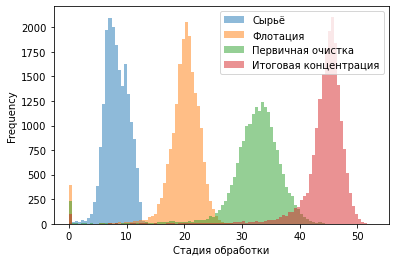

In [35]:
# Код ревьюера

df_full.plot(y= ['rougher.input.feed_au', 'rougher.output.concentrate_au',
                   'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au'],
               kind='hist',
               bins= 100,
               alpha = 0.5,
               label = ['Сырьё', 'Флотация', 'Первичная очистка', 'Итоговая концентрация'],
               legend = True
              )
plt.ylabel('Frequency')
plt.xlabel('Стадия обработки')
plt.show()

<div class="alert alert-block alert-warning">
<b>Комментарий студента[2]:</b> спасибо
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ⚠️\
<font color='darkorange'> Нужно построить ещё два графика для серебра и свинца.</font>

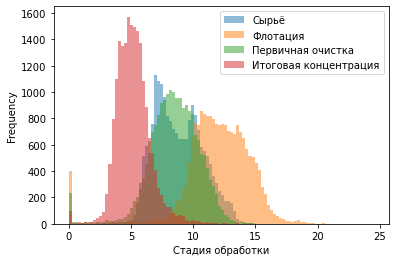

In [36]:
df_full.plot(y= ['rougher.input.feed_ag', 'rougher.output.concentrate_ag',
                   'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag'],
               kind='hist',
               bins= 100,
               alpha = 0.5,
               label = ['Сырьё', 'Флотация', 'Первичная очистка', 'Итоговая концентрация'],
               legend = True
              )
plt.ylabel('Frequency')
plt.xlabel('Стадия обработки')
plt.show()

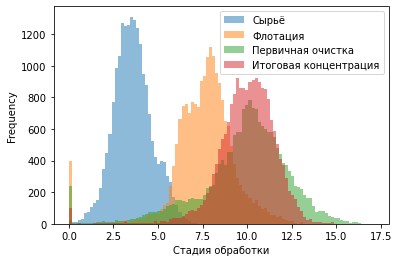

In [37]:
df_full.plot(y= ['rougher.input.feed_pb', 'rougher.output.concentrate_pb',
                   'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb'],
               kind='hist',
               bins= 100,
               alpha = 0.5,
               label = ['Сырьё', 'Флотация', 'Первичная очистка', 'Итоговая концентрация'],
               legend = True
              )
plt.ylabel('Frequency')
plt.xlabel('Стадия обработки')
plt.show()

### Вывод

Для золота распределение в первичной очистке отличается от других стадий, которые имеют схожие распределения. Максимальное значение количества металлов в первичной очистке наименьшее из всех стадий. Стадии идут последовательно. 

Для серебра распределение в первичной очистке и сырье значительных различий не имеют и по стадии разработки находятся на одинаковом уровне. Распределние в итоговой концентрации самое высокое и идет сначала стадии, а во флотации самое низкое и идет в конце стадии.

Для свинца распределение в первичной очистке и итоговой концентрации значительных различий не имеют, первичная очистка имеет больше выбросов. Первичная очистка и итоговая концентрация находятся на одном уровне по стадии разработки. Распределение в сырье самое высокое по значениям и идет сначала. Последующим этапом идет флотация, его распределение меньше сырья, но больше первичной очистки и итоговой концентрации.

<div class="alert alert-block alert-warning">
<b>Комментарий студента[3]:</b> кстати не очень понял, как считается стадия разработки по оси абсцисс?
</div>

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

In [38]:
def granula(test_1,test_2,size):
    pd.Series(test_1).hist(bins=100, figsize=(13, 7), range=(0, size),alpha=0.7,density=True)

    plt.title('Распределение размера гранул')
    plt.xlabel('Размер гранулы')
    plt.ylabel('Количество гранул')

    None

    pd.Series(test_2).hist(bins=100, figsize=(13, 7), range=(0, size),alpha=0.7,density=True)

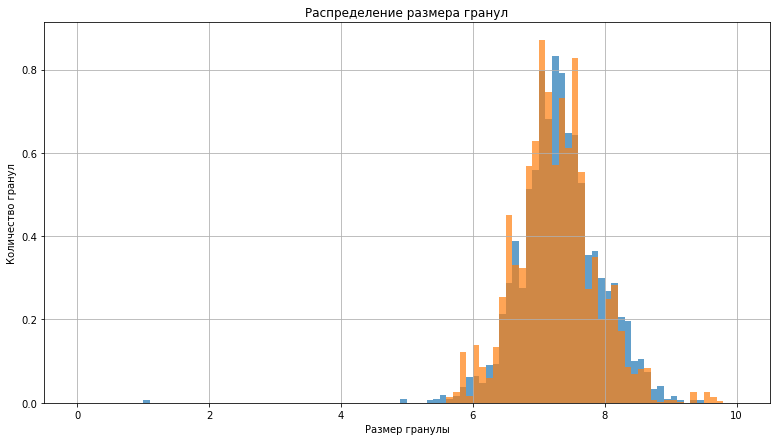

In [39]:
granula(df_train_1['primary_cleaner.input.feed_size'],df_test['primary_cleaner.input.feed_size'],10)

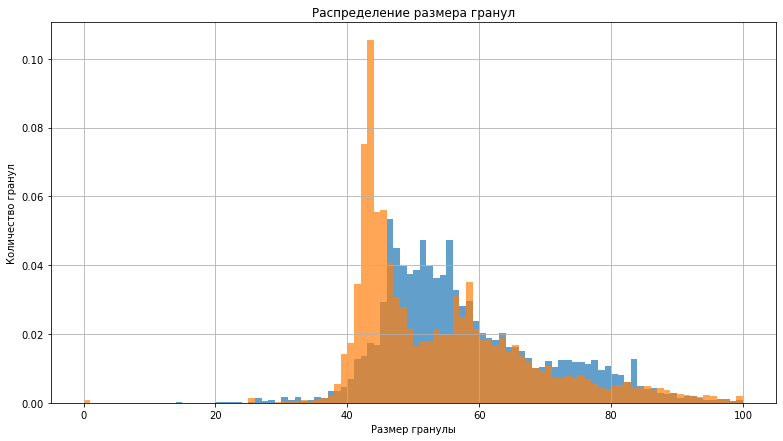

In [40]:
granula(df_train_1['rougher.input.feed_size'],df_test['rougher.input.feed_size'],100)

 На графиках точно не определишь. Определим гипотезу: распределения размеров гранул сырья на обучающей выборке отличается от тестовой - это H0. H1 - не отличаются.

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'> В данном случае нужно использовать параметр "density=True" в методе ".hist()". Так бы нам удалось перейти от количества к доле.
</font>

<div class="alert alert-block alert-warning">
<b>Комментарий студента[2]:</b> исправил.
</div>

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'>👍</font>

In [41]:
#проверка 0-й гипотезы
hyp0=st.ttest_ind(df_train['primary_cleaner.input.feed_size'],df_test['primary_cleaner.input.feed_size'])
hyp0.pvalue

1.4864182926123011e-08

In [42]:
#проверка 0-й гипотезы
hyp0_1=st.ttest_ind(df_train['rougher.input.feed_size'],df_test['rougher.input.feed_size'])
hyp0_1.pvalue

1.6081245670812532e-33

В первой очистке размеры сырья в обучающей и тестовой выборках различаются по гипотезе => оценка модели будет менее верной.
Во флотации размеры сырья в обучающей и тестовой выборках различаются по гипотезе => оценка модели будет менее верной.

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='darkorange'>Диапазон Теста перекрывается трейном. Можно обучать )).</font>

<div class="alert alert-block alert-warning">
<b>Комментарий студента[2]:</b> не понял, все хорошо?
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Визуально значительных различий между train и test не наблюдается</font>

### Исследование суммарной концентрации всех веществ на разных стадиях

In [43]:
def raspr_summ(ag,pb,sol,au):
    raspr = []
    x=0
    for i in range(len(ag)):
        x+=ag[i]
        x+=pb[i]
        x+=sol[i]
        x+=au[i]
        raspr.append(x)
        x=0
    raspr=pd.Series(raspr)
    return raspr

<AxesSubplot:title={'center':'Распределение размера гранул'}, xlabel='Размер гранулы', ylabel='Количество гранул'>

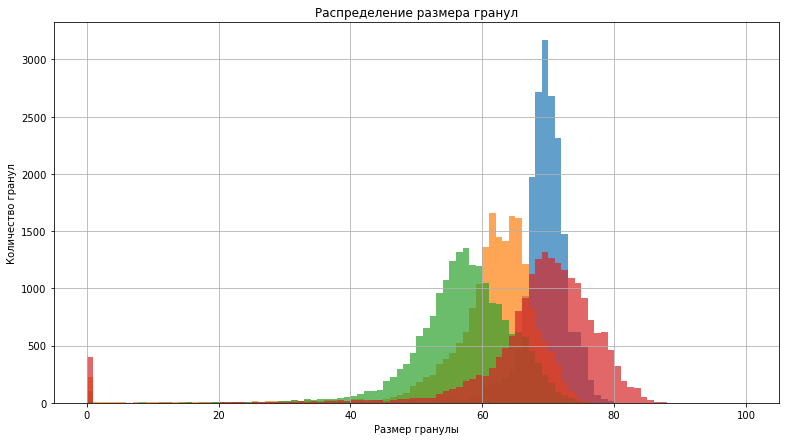

In [44]:
final_output=raspr_summ(df_full['final.output.concentrate_ag'],df_full['final.output.concentrate_pb'],
                       df_full['final.output.concentrate_sol'],df_full['final.output.concentrate_au'])
primary_cleaner=raspr_summ(df_full['primary_cleaner.output.concentrate_ag'],df_full['primary_cleaner.output.concentrate_pb'],
                       df_full['primary_cleaner.output.concentrate_sol'],df_full['primary_cleaner.output.concentrate_au'])
rougher_input=raspr_summ(df_full['rougher.input.feed_ag'],df_full['rougher.input.feed_pb'],
                       df_full['rougher.input.feed_au'],df_full['rougher.input.feed_sol'])
rougher_output=raspr_summ(df_full['rougher.output.concentrate_ag'],df_full['rougher.output.concentrate_pb'],
                       df_full['rougher.output.concentrate_sol'],df_full['rougher.output.concentrate_au'])
pd.Series(final_output).hist(bins=100, figsize=(13, 7), range=(0, 100),alpha=0.7)

plt.title('Распределение размера гранул')
plt.xlabel('Размер гранулы')
plt.ylabel('Количество гранул')

None

pd.Series(primary_cleaner).hist(bins=100, figsize=(13, 7), range=(0, 100),alpha=0.7)
pd.Series(rougher_input).hist(bins=100, figsize=(13, 7), range=(0, 100),alpha=0.7)
pd.Series(rougher_output).hist(bins=100, figsize=(13, 7), range=(0, 100),alpha=0.7)

Построим график без учета выбросов

In [45]:
def raspr_summ_not_emiss(ag,pb,sol,au):
    raspr = []
    x=0
    for i in range(len(ag)):
        x+=ag[i]
        x+=pb[i]
        x+=sol[i]
        x+=au[i]
        if x>20:    
            raspr.append(x)
        x=0
    raspr=pd.Series(raspr)
    return raspr

<AxesSubplot:title={'center':'Распределение размера гранул'}, xlabel='Размер гранулы', ylabel='Количество гранул'>

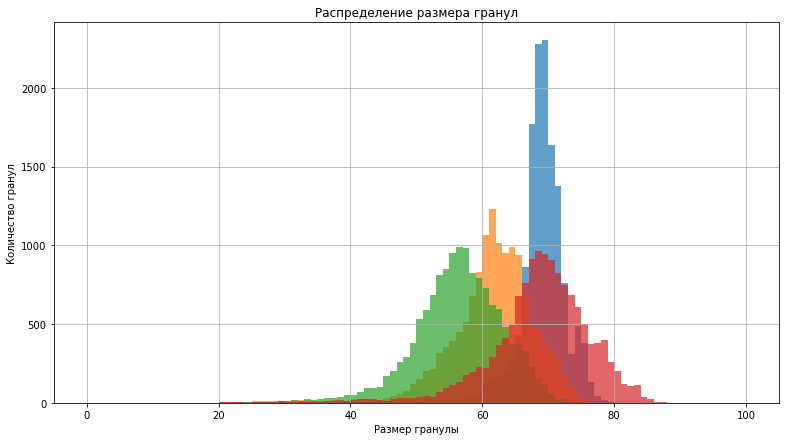

In [46]:
final_output=raspr_summ_not_emiss(df_train['final.output.concentrate_ag'],df_train['final.output.concentrate_pb'],
                       df_train['final.output.concentrate_sol'],df_train['final.output.concentrate_au'])
primary_cleaner=raspr_summ_not_emiss(df_train['primary_cleaner.output.concentrate_ag'],df_train['primary_cleaner.output.concentrate_pb'],
                       df_train['primary_cleaner.output.concentrate_sol'],df_train['primary_cleaner.output.concentrate_au'])
rougher_input=raspr_summ_not_emiss(df_train['rougher.input.feed_ag'],df_train['rougher.input.feed_pb'],
                       df_train['rougher.input.feed_au'],df_train['rougher.input.feed_sol'])
rougher_output=raspr_summ_not_emiss(df_train['rougher.output.concentrate_ag'],df_train['rougher.output.concentrate_pb'],
                       df_train['rougher.output.concentrate_sol'],df_train['rougher.output.concentrate_au'])
pd.Series(final_output).hist(bins=100, figsize=(13, 7), range=(0, 100),alpha=0.7)

plt.title('Распределение размера гранул')
plt.xlabel('Размер гранулы')
plt.ylabel('Количество гранул')

None

pd.Series(primary_cleaner).hist(bins=100, figsize=(13, 7), range=(0, 100),alpha=0.7)
pd.Series(rougher_input).hist(bins=100, figsize=(13, 7), range=(0, 100),alpha=0.7)
pd.Series(rougher_output).hist(bins=100, figsize=(13, 7), range=(0, 100),alpha=0.7)

In [47]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   date                                                14149 non-null  object
 1   final.output.concentrate_ag                         14149 non-null  object
 2   final.output.concentrate_pb                         14149 non-null  object
 3   final.output.concentrate_sol                        14149 non-null  object
 4   final.output.concentrate_au                         14149 non-null  object
 5   final.output.recovery                               14149 non-null  object
 6   final.output.tail_ag                                14149 non-null  object
 7   final.output.tail_pb                                14149 non-null  object
 8   final.output.tail_sol                               14149 non-null  object
 9   final.

### Вывод

Распределение в первичной очистке отличается от других стадий, которые имеют схожие распределения.
Размеры сырья в обучающей и тестовой выборках различаются.

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='red'> Нужно почистить трейн от выбросов. Для этого нам пригодятся удалённые ранее столбцы.</font>

<div class="alert alert-block alert-warning">
<b>Комментарий студента[2]:</b> использую df_train с раннее удаленными признаками. Функция raspr_summ_not_emiss не помогает мне избавиться от выбросов?
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='blue'>Столбцы были удалены в train_df_1, а выбросы в train_df, теперь в обучение нужно подать train_df, удалив из него столбцы.</font>

## Построение модели

### Функция sMAPE

In [48]:
#smape
def smape(target, predicted):
    return 1/len(target) * np.sum(2 * np.abs(
       target - predicted) / (np.abs(target) + np.abs(predicted))*100)
 
def smape_final(rougher, final):
    return 0.25*rougher + 0.75*final

score_smape = make_scorer(smape, greater_is_better=False)

<font color='blue'><b>Комментарий ревьюера: </b></font> ✔️\
<font color='green'> `smape` расчитана верно.</font>

<font color='blue'><b>Комментарий ревьюера: </b></font> ⚠️\
<font color='orange'> Цикл сильно тормозит вычисления. Для суммы в Pyhton есть отличные методы!</font>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> smape правильно, если я хочу сделать параметры a,b, как ДатаФреймы?
</div>

<font color='blue'><b>Комментарий ревьюера: </b></font>\
<font color='blue'>Если Таргеты и Предикты будут содержать по два столбца, то нужно внутри функции разделить их на отдельные столбцы, по каждой паре посчитать smape и подать взвешенную (Итоговую) smape на выход функции. </font>

<div class="alert alert-block alert-warning">
<b>Комментарий студента[2]:</b> исправил.
</div>

### Обучение разных моделей

#### Признаки

In [49]:
df_test_1=df_test.merge(df_full[['rougher.output.recovery','date']], on='date')
df_test_1=df_test_1.merge(df_full[['final.output.recovery','date']],on='date',how='left')
df_test_1.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.08,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.31785,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.08,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.95827,-525.839648,4.87885,-500.162375,25.01994,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.86836,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.82851,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.64,0.863514,1399.618111,-498.863574,1397.44012,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.9314,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.68253,7.53,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.3975,8.10789,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> почему merge не работает?
</div>

<font color='blue'><b>Комментарий ревьюера: </b></font>\
<font color='blue'>Кроме таргетов нужно ещё извлекать 'date', что бы можно было сопоставить строки.</font>

<div class="alert alert-block alert-warning">
<b>Комментарий студента[2]:</b> спасибо
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>👍</font>

In [50]:
df_test_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5290 entries, 0 to 5289
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   date                                        5290 non-null   object
 1   primary_cleaner.input.sulfate               5290 non-null   object
 2   primary_cleaner.input.depressant            5290 non-null   object
 3   primary_cleaner.input.feed_size             5290 non-null   object
 4   primary_cleaner.input.xanthate              5290 non-null   object
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   object
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   object
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   object
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   object
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   object
 10  primary_cleaner.state.fl

In [51]:
delete=['final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_sol','final.output.concentrate_au',
 'final.output.tail_ag','final.output.tail_pb','final.output.tail_sol','final.output.tail_au',
 'primary_cleaner.output.concentrate_ag','primary_cleaner.output.concentrate_pb','primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au','primary_cleaner.output.tail_ag','primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol','primary_cleaner.output.tail_au','rougher.calculation.sulfate_to_au_concentrate','rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed','rougher.calculation.au_pb_ratio','rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb','rougher.output.concentrate_sol','rougher.output.concentrate_au',
 'rougher.output.tail_ag','rougher.output.tail_pb','rougher.output.tail_sol','rougher.output.tail_au',
 'secondary_cleaner.output.tail_ag','secondary_cleaner.output.tail_pb','secondary_cleaner.output.tail_sol',
 'secondary_cleaner.output.tail_au']

In [52]:
#выделяем фичи и таргеты
targets = ['rougher.output.recovery', 'final.output.recovery','date']
features_train = df_train.drop(targets, axis='columns')
target_train = df_train[targets]
target_train = target_train.drop('date',axis=1)
features_test = df_test_1.drop(targets, axis='columns')
target_test = df_test_1[targets]
target_test = target_test.drop('date',axis=1)
target_test_rougher = target_test['rougher.output.recovery']
target_test_final = target_test['final.output.recovery']
target_train_rougher = target_train['rougher.output.recovery']
target_train_final = target_train['final.output.recovery']

features_train=features_train.drop(delete, axis=1)
features_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   primary_cleaner.input.sulfate               14149 non-null  object
 1   primary_cleaner.input.depressant            14149 non-null  object
 2   primary_cleaner.input.feed_size             14149 non-null  object
 3   primary_cleaner.input.xanthate              14149 non-null  object
 4   primary_cleaner.state.floatbank8_a_air      14149 non-null  object
 5   primary_cleaner.state.floatbank8_a_level    14149 non-null  object
 6   primary_cleaner.state.floatbank8_b_air      14149 non-null  object
 7   primary_cleaner.state.floatbank8_b_level    14149 non-null  object
 8   primary_cleaner.state.floatbank8_c_air      14149 non-null  object
 9   primary_cleaner.state.floatbank8_c_level    14149 non-null  object
 10  primary_cleaner.state.

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Лишние столбцы удалены!</font>

#### Регрессия дерева решений(version 1 - неверно)

In [53]:
model = RandomForestRegressor(max_depth=4, n_estimators=150, min_samples_leaf= 7, random_state=12345)
model.fit(features_train, target_train_rougher)
predicted = model.predict(features_test)
smape_rougher = smape(target_test_rougher, predicted)

print('ok')

scores=cross_val_score(model, features_train, target_train_rougher, cv=5, scoring=score_smape) 
final_score = scores.mean()
print('Средняя оценка качества модели rougher:', final_score)

print('ok')

model = RandomForestRegressor(max_depth=4, n_estimators=150, min_samples_leaf= 7, random_state=12345)
model.fit(features_train, target_train_final)
predicted = model.predict(features_test)
smape_output = smape(target_test_final, predicted)

scores=cross_val_score(model, features_train, target_train_final, cv=5, scoring=score_smape) 
final_score = scores.mean()
print('Средняя оценка качества модели final:', final_score)
 
score_test = smape_final(smape_rougher, smape_output)
 
print('Итоговое sMAPE для тестовой выборки:',score_test )

ok
Средняя оценка качества модели rougher: -11.19326923094886
ok
Средняя оценка качества модели final: -10.260269309794646
Итоговое sMAPE для тестовой выборки: 9.774072472378439


<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='blue'> Сначала проводится кроссвалидация (оценка) всех моделей, подбор гиперпараметров, выбирается лучшая модель и затем проводится тестирование лучшей модели (и Dummy) на тестовых данных. Выбирать модель на тестовых данных нельзя - так мы подстраиваемся под тест. </font>

#### Дамми-регрессия(version 1 - неверно) - сравнение с константной моделью

In [54]:
model = DummyRegressor(strategy='mean').fit(features_train, target_train_rougher)
predicted = model.predict(features_test)
smape_rougher = smape(target_test_rougher, predicted)

scores=cross_val_score(model, features_train, target_train_rougher, cv=5, scoring=score_smape) 
final_score = scores.mean()
print('Средняя оценка качества модели rougher:', final_score)

print('ok')

model = DummyRegressor(strategy='mean').fit(features_train, target_train_final)
predicted = model.predict(features_test)
smape_output = smape(target_test_final, predicted)

scores=cross_val_score(model, features_train, target_train_final, cv=5, scoring=score_smape) 
final_score = scores.mean()
print('Средняя оценка качества модели final:', final_score)
 
score_test = smape_final(smape_rougher, smape_output)
 
print('Итоговое sMAPE для тестовой выборки:',score_test )

Средняя оценка качества модели rougher: -12.215336413217319
ok
Средняя оценка качества модели final: -11.361359303211886
Итоговое sMAPE для тестовой выборки: 10.289630376021062


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'> Классно, что сравниваешь с константной моделью! но надо сделать тест (predict(features_test).</font>

<div class="alert alert-block alert-warning">
<b>Комментарий студента[3]:</b> если я уберу predicted, что тогда положу в smape? Ведь после этого и нужно сделать predicted = model.predict(features_test), правильно понимаю?
</div>

<font color='blue'><b>Комментарий ревьюера: </b></font> ❌\
<font color='blue'>Сначала модели оцениваются по кроссвалидации, `cross_val_score` - выдаёт оценку по smape, посколькку туда был передан Скорер (score_smape), в котрорый была передана наша функция smape. Оценивать модели ()выбирать лучшую нужно именно по этим оценкам (то что выводится как Средняя оценка качества модели). Тестирование (predict(test)) проводится в конце проекта и только для Лучшей модели, для подтверждения результата и контроля переобучения.</font>

#### Линейная регрессия(version 1 - неверно)

In [55]:
model=LinearRegression()
model.fit(features_train, target_train_rougher)
predicted = model.predict(features_test)
smape_rougher = smape(target_test_rougher, predicted)

scores=cross_val_score(model, features_train, target_train_rougher, cv=5, scoring=score_smape) 
final_score = scores.mean()
print('Средняя оценка качества модели rougher:', final_score)

print('ok')

model=LinearRegression()
model.fit(features_train, target_train_final)
predicted = model.predict(features_test)
smape_output = smape(target_test_final, predicted)

scores=cross_val_score(model, features_train, target_train_final, cv=5, scoring=score_smape) 
final_score = scores.mean()
print('Средняя оценка качества модели final:', final_score)

score_test = smape_final(smape_rougher, smape_output)
 
print('Итоговое sMAPE для тестовой выборки:',score_test )

Средняя оценка качества модели rougher: -12.802483458481806
ok
Средняя оценка качества модели final: -12.245300320302173
Итоговое sMAPE для тестовой выборки: 9.972775555351216


#### Обучение модели с помощью GridSearchCV(version 2)

Для проверки:

In [62]:
from numpy.random import RandomState
state = RandomState(12345)
 
pipe = Pipeline([
    ('imp', SimpleImputer(missing_values=np.nan)),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=100, random_state=state))
])
 
params = [
    {
        'imp__strategy': ['mean', 'median'],
        'model': [RandomForestRegressor(n_estimators=10, random_state=state)],
        'model__max_features': np.linspace(0.1, 1, 10)
    }, {
        'imp__strategy': ['mean', 'median'],
        'model': [LinearRegression()]
    }, {
        'imp__strategy': ['mean', 'median'],
        'model': [linear_model.Lasso(random_state=state)],
        'model__alpha': np.logspace(-3, 1, 10)
    }
]
 
params_1 = [
    {
        'model': [RandomForestRegressor(n_estimators=10, random_state=state)],
        'model__max_features': np.linspace(0.1, 1, 10)
    }, {
        'model': [LinearRegression()]
    }, {
        'model': [linear_model.Lasso(random_state=state)],
        'model__alpha': np.logspace(-3, 1, 10)
    }
] 
 
params1 = {'penalty':['l1', 'l2'],'dual':[True, False],'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000], 'fit_intercept':[True, False],
        'solver':['saga']} 
# подготовим метрику smape и проведем кроссвалидацию с помощью KFold
 
smape_score = make_scorer(smape, greater_is_better=False)
 
 
cv = KFold(n_splits=5, shuffle=False)
model_rougher = GridSearchCV(pipe, param_grid=params_1, cv=cv, n_jobs=-1, scoring=smape_score)
model_rougher.fit(features_train, target_train_rougher)
 
print('Лучшие параметры:', model_rougher.best_params_)
print('Лучший sMAPE:', model_rougher.best_score_)

Лучшие параметры: {'model': Lasso(alpha=1.2915496650148828,
      random_state=RandomState(MT19937) at 0x21E74346640), 'model__alpha': 1.2915496650148828}
Лучший sMAPE: -11.217921246217767


<font color='blue'><b>Комментарий ревьюера 3: </b></font> ⚠️\
<font color='darkorange'> SimpleImputer не нужен, у нас нет пропусков. Но он увеличивает сетку параметров в два раза. </font>

<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'>Подбор гиперпараметров проведён верно. Использована целевая метрика, направление отбора верное ).</font>

In [63]:
model_final = GridSearchCV(pipe, param_grid=params_1, cv=cv, n_jobs=-1, scoring=smape_score)
model_final.fit(features_train, target_train_final)
 
print('Лучшие параметры:', model_final.best_params_)
print('Лучший sMAPE:', model_final.best_score_)

Лучшие параметры: {'model': Lasso(alpha=0.46415888336127775,
      random_state=RandomState(MT19937) at 0x21E74346640), 'model__alpha': 0.46415888336127775}
Лучший sMAPE: -10.125892952189876


<font color='blue'><b>Комментарий ревьюера 2: </b></font> ❌\
<font color='red'><s> Нам нужно сделать подбор гиперпараметров хотябы одной модели по кросс-валидации.\
Для этого можно использовать `GridSearchCV` или написать цикл где будут перебираться параметры модели (например, `'max_depth'` для `RandomForestRegressor`), оцениваться средняя метрика по кроссвалидации и сохраняться параметры дающие лучшую метрику.</s></font>

<div class="alert alert-block alert-warning">
<b>Комментарий студента[3]:</b> отдельно сделал подбор гиперпараметров, подсмотрел решение у коллеги, не очень хорошо разобрался с GridSearchCV, просто сейчас на это мало времени, т.к. мой проект должны сегодня принять. Есть ли какие-нибудь статьи по этому методу? Обязательно разберусь
</div>

[GridSearchCV](https://russianblogs.com/article/44371250346/)

<div class="alert alert-block alert-warning">
<b>Комментарий студента:</b> времени мало... Помогите, пожалуйста, как разбиение данных сделать в моем случае? Уже очень долго с этим мучаюсь.
</div>

<font color='blue'><b>Комментарий ревьюера: </b></font> \
<font color='blue'>Модели нужно оценить кроссвалидацией, подобрать гиперпараметры по кроссвалидации, провести тестирование на тестовых данных и сравнить с предсказанием константной модели.</font>

<div class="alert alert-block alert-warning">
<b>Комментарий студента[2]:</b> о чем говорит среднее значение cross_val_score мне, как специалисту? Чем меньше среднее cross_val_score, тем лучше? И в задании же не сказано сравнить с предсказанием константной модели, но если сделать, то чему должна равняться константа, если не 0?
</div>

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Кроссвалидация оценивает модели на разных выборках из данных. Это более стабильная оцненка работы модели, чем predict на одной выборке.\
Константная модель показывает Бейзлайн - точку отсчёта по которой можно оценить результаты тестов. Константа в данном случае - это среднее значение таргета.</font>

## Финальное тестирование

In [67]:
model_rougher = linear_model.Lasso(alpha=1.2915496650148828,random_state=state)
model_rougher.fit(features_train, target_train_rougher)
predicted_rougher = model.predict(features_test)
smape_rougher = smape(target_test_rougher, predicted_rougher)

model_final = linear_model.Lasso(alpha=0.46415888336127775,random_state=state)
model_final.fit(features_train, target_train_final)
predicted_final = model.predict(features_test)
smape_output = smape(target_test_rougher, predicted_final)

score_test = smape_final(smape_rougher, smape_output)
 
print('Итоговое sMAPE для тестовой выборки:',score_test )

Итоговое sMAPE для тестовой выборки: 8.512553059312221


<font color='blue'><b>Комментарий ревьюера 3: </b></font> ✔️\
<font color='green'>Тестирование проведено верно.</font>

### Вывод

Учитывая подбор гиперпараметров лучшей моделью оказалась linear_model.Lasso, которая показала итоговый показатель sMAPE - 8.512553059312221.

## Общий вывод

Эффективность обогащения рассчитана правильно. 


Для золота распределение в первичной очистке отличается от других стадий, которые имеют схожие распределения. Максимальное значение количества металлов в первичной очистке наименьшее из всех стадий. Стадии идут последовательно.

Для серебра распределение в первичной очистке и сырье значительных различий не имеют и по стадии разработки находятся на одинаковом уровне. Распределние в итоговой концентрации самое высокое и идет сначала стадии, а во флотации самое низкое и идет в конце стадии.

Для свинца распределение в первичной очистке и итоговой концентрации значительных различий не имеют, первичная очистка имеет больше выбросов. Первичная очистка и итоговая концентрация находятся на одном уровне по стадии разработки. Распределение в сырье самое высокое по значениям и идет сначала. Последующим этапом идет флотация, его распределение меньше сырья, но больше первичной очистки и итоговой концентрации.


Распределение в первичной очистке отличается от других стадий, которые имеют схожие распределения. Размеры сырья в обучающей и тестовой выборках различаются.

Выбрали модель: linear_model.Lasso.
Показатель sMAPE: 8.512553059312221.

<font color='blue'><b>Комментарий ревьюера 2: </b></font> ✔️\
<font color='green'>Очень приятно видеть вывод в конце проекта! В выводах можно приводить полученные ранее значения. Также можно расписать все, что было сделано в ходе проведения работы.</font>

<font color='blue'><b>Итоговый комментарий ревьюера 3</b></font>\
<font color='green'> Андрей, проект принят! \
Все этапы пройдены. Все критичные рекомендации учтены.\
Надеюсь, тебе понравился процесс выполнения и результат.</font> \
<font color='blue'><b>Спасибо, удачи в освоении профессии!</b></font>

<font color='blue'><b>Итоговый комментарий ревьюера 2</b></font>\
<font color='green'>Андрей, хороший проект получился!
Большое спасибо за проделанную работу. Видно, что приложено много усилий.
</font>

<font color='blue'>Что нужно исправить:</font>
<ul><font color='red'>Подбери гиперпараметры по кроссвалидации, хотя бы для одной модели.</font></ul>

<font color='blue'>Что можно сделать лучше:</font>
<font color='orange'>В работе я оставил несколько советов. Буду рад, если ты учтешь их.</font></ul>

<font color='blue'><b>Жду новую версию проекта :)</b></font>

<div class="alert alert-block alert-warning">
<b>Комментарий студента[3]:</b> спасибо!
</div>

<font color='blue'><b>Итоговый комментарий ревьюера</b></font>

<font color='blue'>К сожалению, проект не готов. Присылай законченную версию. По всем непонятным моментам можно обращаться за помощью наставникам и преподавателям, а также комьюнити студентов. Буду ждать :)

</font>